<a href="https://colab.research.google.com/github/LILY-182/sales_prediction_ML/blob/main/MLRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####INTRO TO MACHINE LEARNING
This is the art of making machines/computers intelligent(just like humans) without explicitly programming.
This intelligence will be achieved by making them learn from data.

####Terms
1. Artificial intelligence
AI is basically making computers/machines think(reasoning) and act just like humans. Human intelligence(learning, vision,communicate,motion,brain) is mimicked (copied) in machines

#####Branches of AI
a) Machine learning: focuses on training computers to learn from historical data and then make future predictionse.g patient diagnosis,sales forecasting,weather etc

b) Natural language processing: focuses on making computers understand and interpret a natural language(not a programming language e.g speech, text)e.g chatbots, sentiment analysis

c) Robotics; Deals with movement e,g autonomous vehicles

d) computer vision: Uses another branch called Deep Learning(ANN) to make computers able to see and understand the environment just like human e.g scanning, X - ray images, object detection


In [ ]:
# ML is widely categorized into 2 branches:
#1. supervised machine learning
# Training the machine is done using labelled data:the data set is categorized into
#   a)X/predictors/independent variable/features
#   b)Y/predicted/dependent variable/outcome/labels

#it is divided into a) Regression: Y is continous(numerical)e.g profits, sales,losses
#                   b) Classification: Y is categorical(Text)e.g diagnosis
#2. unsupervised machine learning

In [2]:
#read the advertising dataset
#The dataset below can be used for supervised learning:
#a) TV, radio and newspaper are the X/features
#b) Based on the features, we are predictind the sales(labels/Y)
#Regression: the sales are continous(numerical)
import pandas as pd
df = pd.read_csv('/content/Advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
#EDA 1. statistical
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
#2. checking empties
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [5]:
#3. correlation
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

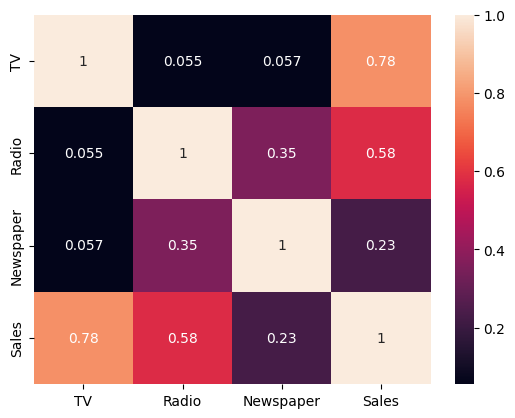

In [8]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='TV', ylabel='Sales'>

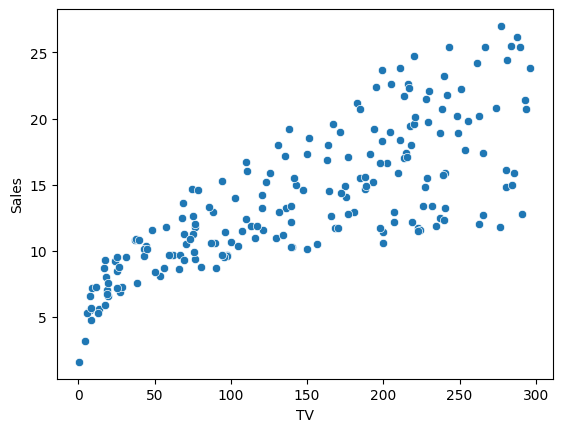

In [12]:
sns.scatterplot(x='TV', y='Sales', data=df)

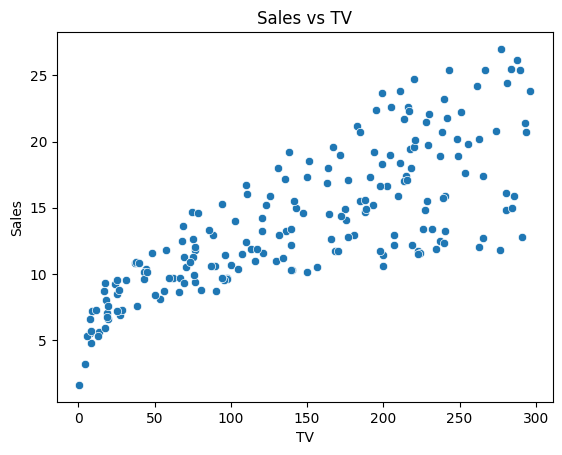

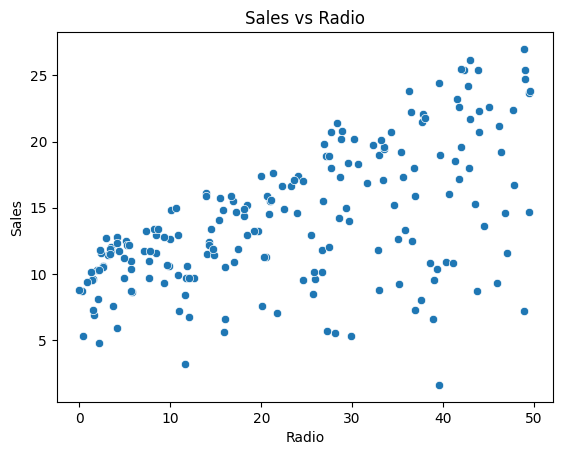

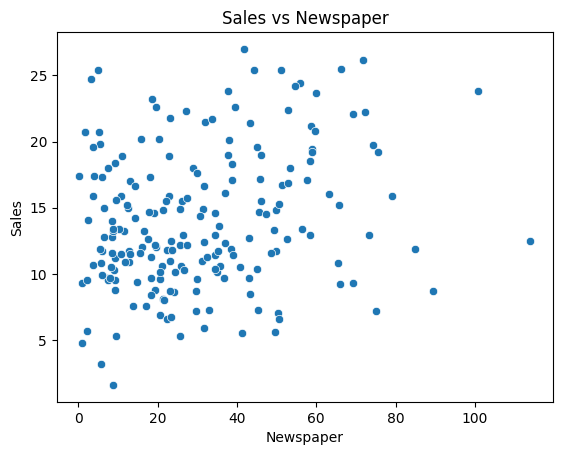

In [14]:
# bivariant correlation
for i in ['TV', 'Radio', 'Newspaper']:
  sns.scatterplot(x=i, y='Sales', data=df)
  plt.title(f'Sales vs {i}')
  plt.show()

In [16]:
#Machine Learning
#Supervised learning
#STEP1: Seperate the data sets into X and Y.
array = df.values
array.shape

(200, 4)

In [20]:
X = array[:,0:3]
X.shape

(200, 3)

In [22]:
Y = array[:,3]
Y.shape

(200,)

In [23]:
#STEP 2: divide the records(rows) into training set(70%) and testing/evaluation set(30%)
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
#STEP 3: training the model
# training sets(x_train,y_train)
#scientific algorithms

In [24]:
#import the algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
#STEP 4: Cross validation
#determine the best algorithm

In [25]:
#STEP 5: TRAINING
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
#STEP 5: accuracy
#        regression- r2_score()
#Mean absolute error



In [26]:
predictions = model.predict(X_test)
predictions

array([18.5, 23.8, 17.6,  5.3, 23.8, 15.3, 22.6,  9.9, 12. , 16.6,  8.8,
        8.6, 11.7,  3.2, 10.3, 12.6,  5.3, 17.3,  9.7, 19.8, 18.9, 15.3,
       10.8, 23.8,  9.9,  8.7, 22.6, 12.2, 10.6,  4.8, 11.4, 10.1, 23.8,
        9.3, 15.7, 23.8, 10.4, 17.6, 12.2,  6.6, 11.6, 12.6, 11.8,  9.9,
       11.8,  8.8,  9.7, 15.5,  9.7, 11.8, 13.6, 12.6,  5.3,  5.3,  8.8,
       11.2,  9.9, 24.4,  6.6, 11.4])

In [27]:
Y_test

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 11.5, 14.9,  9.5,
        8.7, 11.9,  5.3, 10.3, 11.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2,  9.3,  8.1, 21.7, 13.4, 10.6,  5.7, 10.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9, 11. , 12.8, 10.1,  9.7,
       11.6,  7.6, 10.5, 14.6, 10.4, 12. , 14.6, 11.7,  7.2,  6.6,  9.4,
       11. , 10.9, 25.4,  7.6, 11.7])

In [34]:
#METRICS
from sklearn.metrics import r2_score
accuracy = r2_score(predictions, Y_test) * 100



In [30]:
#predictions
#Summary
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [35]:
features = [[280, 48, 20]]
outcome = model.predict(features)
print(f"Model predicted {outcome}")
print(f"Model accuracy {accuracy}")

Model predicted [27.]
Model accuracy 94.35698795285745
